# CNN With CIFAR 10

In [1]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torchvision.utils
import torch.utils.data as Data

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Prepare Data

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 125

cifar10_train = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)
train_loader = Data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=1)

cifar10_test = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
test_loader = Data.DataLoader(cifar10_test, batch_size=5, shuffle=False, num_workers=1)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [3]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

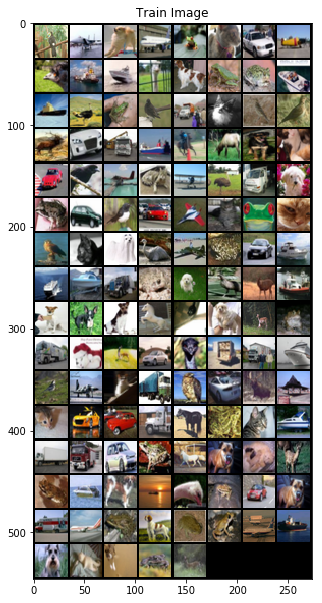

In [4]:
images, labels = iter(train_loader).next()
imshow(torchvision.utils.make_grid(images, normalize=True), "Train Image")

In [5]:
images.size()

torch.Size([125, 3, 32, 32])

# Define Model

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer = nn.Sequential(
            nn.Conv2d(3, 32, 5), # 32 * 28 * 28
            nn.ReLU(),
            nn.BatchNorm2d(32), 
            nn.MaxPool2d(2, 2), # 32 * 14 * 14
            nn.Conv2d(32, 64, 5), # 64 * 10 * 10
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 64 * 5 * 5
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64 * 5 * 5, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(-1, 64 * 5 * 5)
        out = self.fc_layer(out)
        
        return out

In [16]:
model = CNN()

In [17]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [18]:
num_epochs = 10

In [19]:
for epoch in range(num_epochs):
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        X = batch_images
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print('Epoch [%d/%d], Iter [%d/%d], cost: %.4f' % (epoch + 1, num_epochs, i + 1, len(cifar10_train) // batch_size, cost.item()))

Epoch [1/10], Iter [100/400], cost: 1.3331
Epoch [1/10], Iter [200/400], cost: 1.3603
Epoch [1/10], Iter [300/400], cost: 1.1062
Epoch [1/10], Iter [400/400], cost: 0.9880
Epoch [2/10], Iter [100/400], cost: 1.0370
Epoch [2/10], Iter [200/400], cost: 0.8151
Epoch [2/10], Iter [300/400], cost: 0.9281
Epoch [2/10], Iter [400/400], cost: 1.0321
Epoch [3/10], Iter [100/400], cost: 0.8177
Epoch [3/10], Iter [200/400], cost: 1.0684
Epoch [3/10], Iter [300/400], cost: 0.8221
Epoch [3/10], Iter [400/400], cost: 0.9069
Epoch [4/10], Iter [100/400], cost: 0.6619
Epoch [4/10], Iter [200/400], cost: 0.7831
Epoch [4/10], Iter [300/400], cost: 0.8451
Epoch [4/10], Iter [400/400], cost: 0.6765
Epoch [5/10], Iter [100/400], cost: 0.7328
Epoch [5/10], Iter [200/400], cost: 0.6630
Epoch [5/10], Iter [300/400], cost: 0.8061
Epoch [5/10], Iter [400/400], cost: 0.7764
Epoch [6/10], Iter [100/400], cost: 0.6321
Epoch [6/10], Iter [200/400], cost: 0.6024
Epoch [6/10], Iter [300/400], cost: 0.6363
Epoch [6/10

In [22]:
model.eval()

correct = 0
total = 0

for images, labels in test_loader:
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy: %f %%' % (100 * float(correct) / total))

Accuracy: 74.610000 %


Predicted:    cat  ship  ship  ship  frog


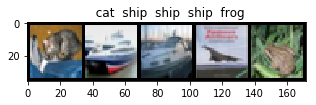

In [26]:
images, labels = iter(test_loader).next()

outputs = model(images)

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(5)))

title = (' '.join('%5s' % classes[predicted[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images, normalize=True), title)